# কোভিড-১৯ মহামারীর অনুমান

## ডেটা লোড করা

আমরা কোভিড-১৯ আক্রান্ত ব্যক্তিদের ডেটা ব্যবহার করব, যা [সেন্টার ফর সিস্টেমস সায়েন্স অ্যান্ড ইঞ্জিনিয়ারিং](https://systems.jhu.edu/) (CSSE) দ্বারা [জনস হপকিন্স ইউনিভার্সিটি](https://jhu.edu/) থেকে সরবরাহ করা হয়েছে। ডেটাসেটটি [এই গিটহাব রিপোজিটরিতে](https://github.com/CSSEGISandData/COVID-19) উপলব্ধ।


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

আমরা `pd.read_csv` ব্যবহার করে সরাসরি GitHub থেকে সর্বশেষ ডেটা লোড করতে পারি। যদি কোনো কারণে ডেটা উপলব্ধ না থাকে, আপনি সর্বদা `data` ফোল্ডারে স্থানীয়ভাবে উপলব্ধ কপিটি ব্যবহার করতে পারেন - শুধু নিচের লাইনটি আনকমেন্ট করুন যা `base_url` সংজ্ঞায়িত করে:


In [125]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
0        0        0        0        0  ...   152448   152448   152448   
1        0        0        0        0  ...   138132   138790   139324   
2        0        0        0        0  ...   190656   191171   191583   
3        0        0        0        0  ...    14988    14988    14988   
4        0        0        0        0  ...    45583    45817    45945   

   8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  8/29/21  
0   152583   152660   152722   152822   152960   152960   152960  
1   139721   140521   141365   142253   143174   144079   144847  
2   192089   192626   193171   193674   194186   194671   195162  
3    15002    15003    15014    15016    15025    15025    15025  
4    46076    46340    46539    46726    46929    47079    47168  

[5 rows x 590 columns]

আমরা দেখতে পাচ্ছি যে টেবিলের প্রতিটি সারি প্রতিটি দেশ এবং/অথবা প্রদেশের সংক্রমিত ব্যক্তিদের সংখ্যা নির্ধারণ করে, এবং কলামগুলি তারিখের সাথে সম্পর্কিত। পুনরুদ্ধারকৃত সংখ্যা এবং মৃত্যুর সংখ্যা মতো অন্যান্য ডেটার জন্য অনুরূপ টেবিল লোড করা যেতে পারে।


In [127]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## ডেটা বোঝা

উপরের টেবিল থেকে প্রদেশ কলামের ভূমিকা স্পষ্ট নয়। চলুন দেখি `Province/State` কলামে কী কী বিভিন্ন মান উপস্থিত রয়েছে:


In [128]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

In [129]:
infected[infected['Country/Region']=='China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88         Unknown          China      NaN       NaN        0        0   
89        Xinjiang          China  41.1129   85.2401        0        2   
90          Yunnan          China  24.9740  101.4870        1        2   
91        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
58       15       39       60       70  ...     1008     1008     1008   
59       36       41       68       80  ...     1112     1113     1115   
60       27       57       75      110  ...      603      603      603   
61       10       18       35       59  ...      780      780      780   
62        2        4        7       14  ...      199      199      199   
63       53       78      111      151  ...     3001     3007     3012   
64       23       23       36       46  ...      289      289      289   
65        3        4        5        7  ...      147      147      147   
66        8       19       22       33  ...      190      190      190   
67        2        8       13       18  ...     1317     1317     1317   
68        4        9       15       21  ...     1614     1614     1614   
69        9       32       83      128  ...     1521     1522     1523   
70        2        5        8        8  ...    12049    12052    12057   
71      549      761     1058     1423  ...    68287    68289    68289   
72       24       43       69      100  ...     1181     1181     1181   
73        1        7        7       11  ...      412      412      412   
74        9       18       33       47  ...     1583     1584     1584   
75       18       18       36       72  ...      937      937      937   
76     

## ডেটা প্রি-প্রসেসিং

আমরা দেশগুলোকে আরও ছোট অঞ্চলগুলিতে বিভক্ত করতে আগ্রহী নই, তাই প্রথমে এই বিভাজন সরিয়ে ফেলব এবং সমস্ত অঞ্চলগুলির তথ্য একসাথে যোগ করব, যাতে পুরো দেশের তথ্য পাওয়া যায়। এটি `groupby` ব্যবহার করে করা যেতে পারে:


In [130]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  8/20/21  8/21/21  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...   152448   152448   
Albania               0        0        0        0  ...   138132   138790   
Algeria               0        0        0        0  ...   190656   191171   
Andorra               0        0        0        0  ...    14988    14988   
Angola                0        0        0        0  ...    45583    45817   

                8/22/21  8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
Country/Region                                                                  
Afghanistan      152448   152583   152660   152722   152822   152960   152960   
Albania          139324   139721   140521   141365   142253   143174   144079   
Algeria          191583   192089   192626   193171   193674   194186   194671   
Andorra           14988    15002    15003    15014    15016    15025    15025   
Angola            45945    46076    46340    46539    46726    46929    47079   

                8/29/21  
Country/Region           
Afghanistan      152960  
Albania          144847  
Algeria          195162  
Andorra           15025  
Angola            47168  

[5 rows x 588 columns]

আপনি দেখতে পাচ্ছেন যে `groupby` ব্যবহার করার কারণে সমস্ত DataFrame এখন Country/Region দ্বারা সূচীকৃত হয়েছে। আমরা তাই `.loc` ব্যবহার করে একটি নির্দিষ্ট দেশের ডেটা অ্যাক্সেস করতে পারি:|


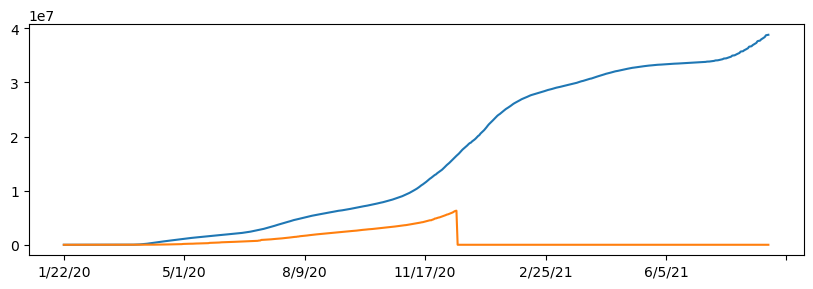

In [131]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

> **নোট** আমরা কীভাবে `[2:]` ব্যবহার করি একটি সিকোয়েন্সের প্রথম দুটি উপাদান সরাতে যা একটি দেশের ভূ-অবস্থান ধারণ করে। আমরা সম্পূর্ণভাবে সেই দুটি কলাম বাদ দিতে পারি:


In [132]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## ডেটা বিশ্লেষণ করা

এবার একটি নির্দিষ্ট দেশের ডেটা বিশ্লেষণ করা যাক। চলুন একটি ফ্রেম তৈরি করি যেখানে তারিখ অনুযায়ী সংক্রমণের ডেটা থাকবে:


In [133]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0
...              ...        ...     ...
2021-08-25  38223029          0  632272
2021-08-26  38384360          0  633564
2021-08-27  38707294          0  636720
2021-08-28  38760363          0  637254
2021-08-29  38796746          0  637531

[586 rows x 3 columns]

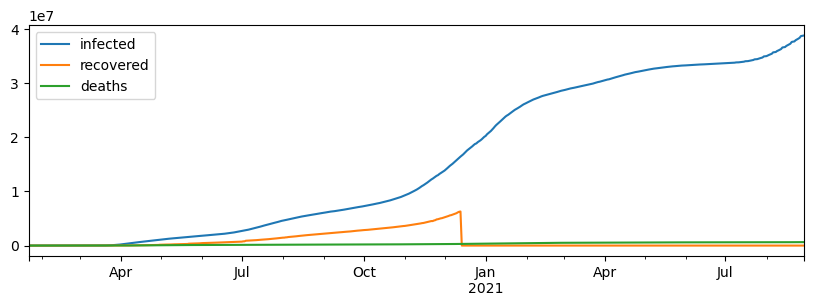

In [134]:
df.plot()
plt.show()

এখন চলুন প্রতিদিন নতুন সংক্রমিত মানুষের সংখ্যা গণনা করি। এটি আমাদের মহামারীর অগ্রগতির গতি দেখতে সাহায্য করবে। এটি করার সবচেয়ে সহজ উপায় হল `diff` ব্যবহার করা:


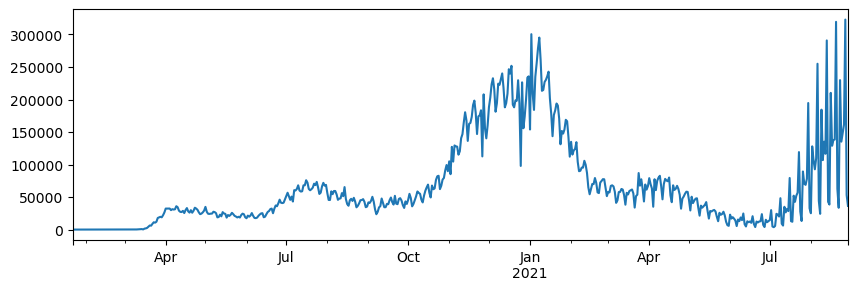

In [135]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

আমরা ডেটায় উচ্চ পরিবর্তন দেখতে পাচ্ছি। চলুন মাসগুলোর মধ্যে একটি আরও কাছ থেকে দেখি:


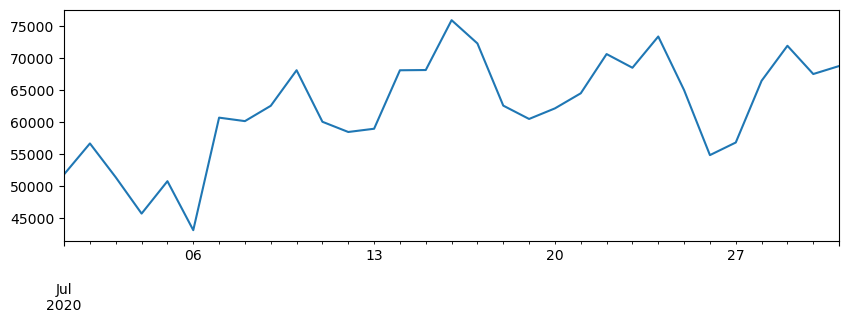

In [136]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

এটি স্পষ্টভাবে দেখা যাচ্ছে যে ডেটায় সাপ্তাহিক পরিবর্তন রয়েছে। কারণ আমরা প্রবণতাগুলি দেখতে চাই, তাই বক্ররেখাটি মসৃণ করা যুক্তিযুক্ত হবে চলমান গড় গণনা করে (অর্থাৎ প্রতিদিনের জন্য আমরা পূর্ববর্তী কয়েক দিনের গড় মান গণনা করব):


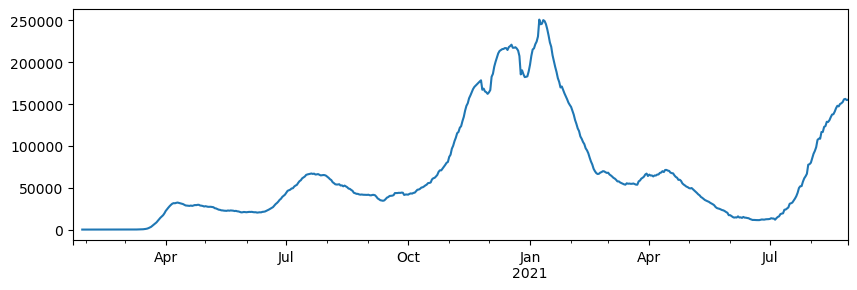

In [137]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

একাধিক দেশ তুলনা করার জন্য, আমরা দেশের জনসংখ্যাকে বিবেচনায় নিতে পারি এবং দেশের জনসংখ্যার তুলনায় সংক্রমিত ব্যক্তিদের শতাংশ তুলনা করতে পারি। দেশের জনসংখ্যা পেতে, চলুন দেশের ডেটাসেট লোড করি:


In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4191  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4192  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4193  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4194  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4195  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4191             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4192             US  43.935225 -110.589080       Teton, Wyoming, US   
4193             US  41.287818 -110.547578       Uinta, Wyoming, US   
4194             US  43.904516 -107.680187    Washakie, Wyoming, US   
4195             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4191     42343.0  
4192     23464.0  
4193     20226.0  
4194      7805.0  
4195      6927.0  

[4196 rows x 12 columns]

কারণ এই ডেটাসেটে দেশ এবং প্রদেশ উভয়ের তথ্য রয়েছে, পুরো দেশের জনসংখ্যা পেতে আমাদের একটু বুদ্ধিমান হতে হবে:


In [139]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region   Lat  \
790  840   US  USA  840.0   NaN    NaN            NaN             US  40.0   

     Long_ Combined_Key   Population  
790 -100.0           US  329466283.0

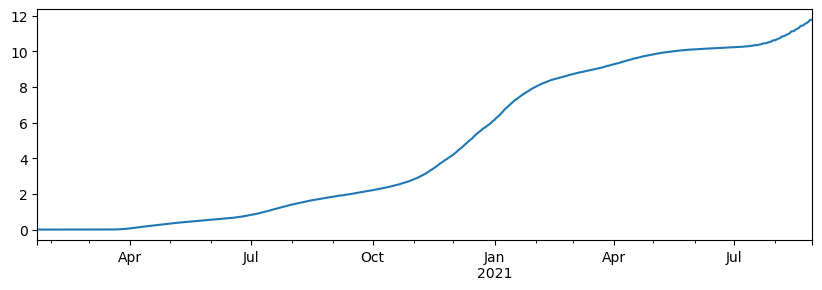

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

## $R_t$ গণনা করা

রোগটি কতটা সংক্রামক তা বোঝার জন্য আমরা **মৌলিক পুনরুৎপাদন সংখ্যা** $R_0$ এর দিকে নজর দিই, যা নির্দেশ করে একজন সংক্রামিত ব্যক্তি আরও কতজনকে সংক্রমিত করবে। যখন $R_0$ ১ এর বেশি হয়, তখন মহামারীটি ছড়িয়ে পড়ার সম্ভাবনা থাকে।

$R_0$ রোগটির নিজস্ব একটি বৈশিষ্ট্য, এবং এটি এমন কিছু প্রতিরোধমূলক ব্যবস্থা বিবেচনা করে না যা মানুষ মহামারী ধীর করার জন্য গ্রহণ করতে পারে। মহামারীর অগ্রগতির সময়, আমরা যে কোনো নির্দিষ্ট সময়ে $t$ এ পুনরুৎপাদন সংখ্যা $R_t$ অনুমান করতে পারি। এটি প্রমাণিত হয়েছে যে এই সংখ্যাটি আনুমানিকভাবে অনুমান করা যেতে পারে ৮ দিনের একটি উইন্ডো নিয়ে এবং $$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$
গণনা করে, যেখানে $I_t$ হলো দিন $t$ এ নতুন সংক্রমিত ব্যক্তিদের সংখ্যা।

চলুন আমাদের মহামারী ডেটার জন্য $R_t$ গণনা করি। এটি করতে, আমরা ৮টি `ninfected` মানের একটি রোলিং উইন্ডো নেব এবং উপরের অনুপাত গণনা করার জন্য ফাংশনটি প্রয়োগ করব:


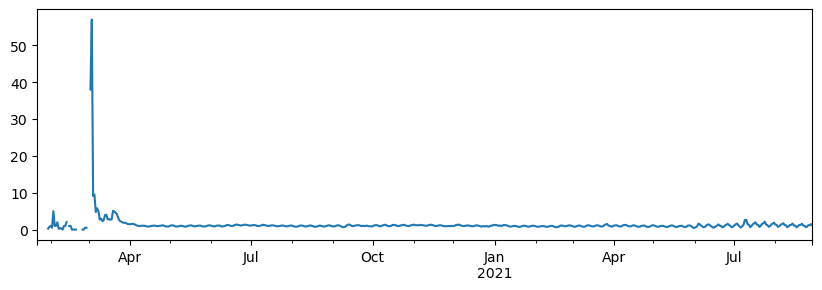

In [141]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

আপনি দেখতে পাচ্ছেন যে গ্রাফে কিছু ফাঁক রয়েছে। এগুলো হতে পারে `NaN` বা `inf` মানের উপস্থিতির কারণে। `inf` সাধারণত ০ দিয়ে ভাগ করার ফলে হতে পারে, এবং `NaN` নির্দেশ করতে পারে অনুপস্থিত ডেটা বা এমন ডেটা যা ফলাফল গণনা করার জন্য উপলব্ধ নয় (যেমন আমাদের ফ্রেমের একেবারে শুরুতে, যেখানে ৮ প্রস্থের রোলিং উইন্ডো এখনও উপলব্ধ নয়)। গ্রাফটিকে আরও সুন্দর করতে, আমাদের এই মানগুলো `replace` এবং `fillna` ফাংশন ব্যবহার করে পূরণ করতে হবে।

চলুন মহামারীর শুরুর দিকে আরও গভীরভাবে নজর দেই। আমরা y-অক্ষের মানগুলোকে ৬ এর নিচে সীমাবদ্ধ করব, যাতে আরও ভালোভাবে দেখা যায়, এবং ১-এ একটি অনুভূমিক রেখা আঁকব।


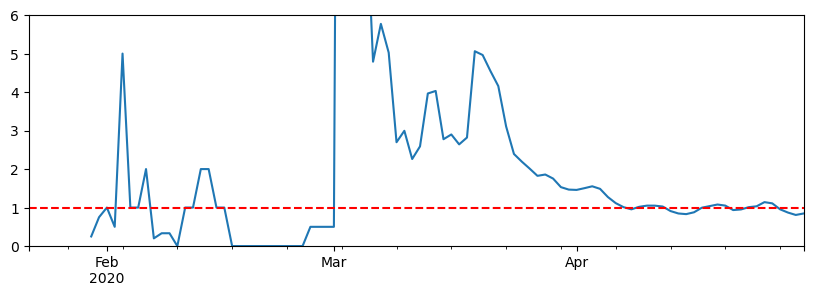

In [142]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

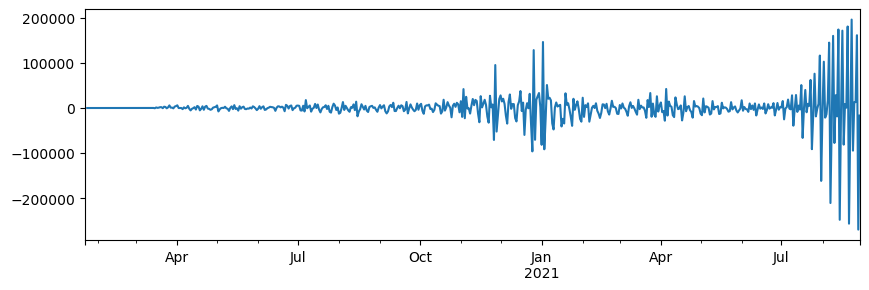

In [143]:
df['ninfected'].diff().plot()
plt.show()

প্রতিবেদন দ্বারা সৃষ্ট ডেটার অনেক পরিবর্তন থাকার কারণে, সামগ্রিক চিত্রটি পাওয়ার জন্য রোলিং গড় চালিয়ে বক্ররেখাটি মসৃণ করা যুক্তিযুক্ত। চলুন আবার মহামারীর প্রথম কয়েক মাসের দিকে মনোযোগ দিই:


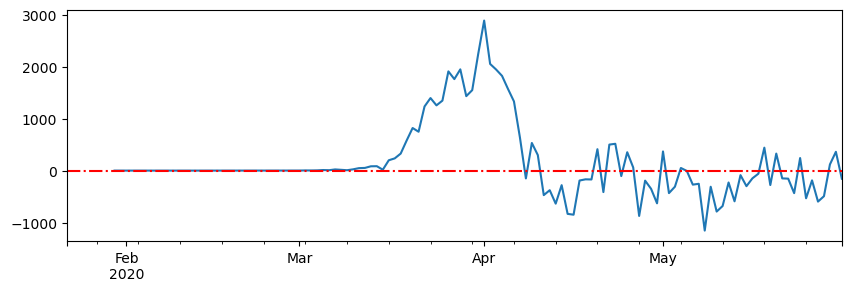

In [150]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

## চ্যালেঞ্জ

এখন সময় এসেছে কোড এবং ডেটা নিয়ে আরও পরীক্ষা-নিরীক্ষা করার! এখানে কিছু প্রস্তাব দেওয়া হলো যা আপনি চেষ্টা করতে পারেন:
* বিভিন্ন দেশে মহামারীর বিস্তারের চিত্র দেখুন।
* তুলনার জন্য একাধিক দেশের $R_t$ গ্রাফ এক প্লটে আঁকুন, অথবা পাশাপাশি একাধিক প্লট তৈরি করুন।
* সংক্রমিত কেসের সংখ্যার সাথে মৃত্যুর সংখ্যা এবং সুস্থতার সংখ্যার সম্পর্ক দেখুন।
* সংক্রমণের হার এবং মৃত্যুর হারের মধ্যে ভিজ্যুয়াল সম্পর্ক স্থাপন করে এবং কিছু অস্বাভাবিকতা খুঁজে বের করে দেখুন একটি সাধারণ রোগ কতদিন স্থায়ী হয়। এটি খুঁজে বের করার জন্য আপনাকে বিভিন্ন দেশের ডেটা দেখতে হতে পারে।
* মৃত্যুর হার গণনা করুন এবং এটি সময়ের সাথে কীভাবে পরিবর্তিত হয় তা দেখুন। গণনার আগে আপনি হয়তো রোগের দৈর্ঘ্য (দিনের হিসেবে) বিবেচনায় নিয়ে একটি টাইম সিরিজকে শিফট করতে চাইবেন।


## রেফারেন্সসমূহ

আপনি COVID মহামারীর বিস্তারের উপর আরও গবেষণার জন্য নিম্নলিখিত প্রকাশনাগুলি দেখতে পারেন:
* [COVID মহামারীর সময় Rt অনুমানের জন্য Sliding SIR মডেল](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/), [Dmitry Soshnikov](http://soshnikov.com)-এর ব্লগ পোস্ট
* T.Petrova, D.Soshnikov, A.Grunin. [গ্লোবাল COVID-19 প্রাদুর্ভাবের জন্য সময়-নির্ভর প্রজনন সংখ্যা অনুমান](https://www.preprints.org/manuscript/202006.0289/v1)। *Preprints* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [উপরোক্ত গবেষণাপত্রের জন্য GitHub-এ কোড](https://github.com/shwars/SlidingSIR)



---

**অস্বীকৃতি**:  
এই নথিটি AI অনুবাদ পরিষেবা [Co-op Translator](https://github.com/Azure/co-op-translator) ব্যবহার করে অনুবাদ করা হয়েছে। আমরা যথাসম্ভব সঠিকতার জন্য চেষ্টা করি, তবে অনুগ্রহ করে মনে রাখুন যে স্বয়ংক্রিয় অনুবাদে ত্রুটি বা অসঙ্গতি থাকতে পারে। মূল ভাষায় থাকা নথিটিকে প্রামাণিক উৎস হিসেবে বিবেচনা করা উচিত। গুরুত্বপূর্ণ তথ্যের জন্য, পেশাদার মানব অনুবাদ সুপারিশ করা হয়। এই অনুবাদ ব্যবহারের ফলে কোনো ভুল বোঝাবুঝি বা ভুল ব্যাখ্যা হলে আমরা দায়বদ্ধ থাকব না।
